In [1]:
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError
from keras import backend as K
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
from tensorflow.keras.utils import Sequence

2023-09-27 10:34:36.702717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 10:34:36.812532: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
import footnet_parallel as ftnet

In [3]:
combdf = pd.read_csv('../combined_data_set_Sept11_20k.csv')
train_list = list(combdf[combdf['flag'] == 1]['path'])
valid_list = list(combdf[combdf['flag'] == 2]['path'])
test_list = list(combdf[combdf['flag'] == 3]['path'])
print(len(train_list), len(valid_list), len(test_list))

14449 2550 3001


In [4]:
model = ftnet.build_model(num_var=12)
model.compile()

2023-09-27 10:34:42.493094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 10:34:43.074748: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13163 MB memory:  -> device: 0, name: NVIDIA A2, pci bus id: 0000:3b:00.0, compute capability: 8.6


In [5]:
import proplot as pplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
Rd = 2.87053  # hPa·K-1·m3·kg–1
ggg = 9.80665 # m/s*s

In [6]:
# Unet_checkpt_0.23.h5
# Unet_checkpt_0.44.h5
# 

2023-09-27 10:34:48.233067: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


1/1 [==============================] - 9s 9s/step


2023-09-27 10:34:56.283686: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Text(0.5, 1.0, 'Prediction')

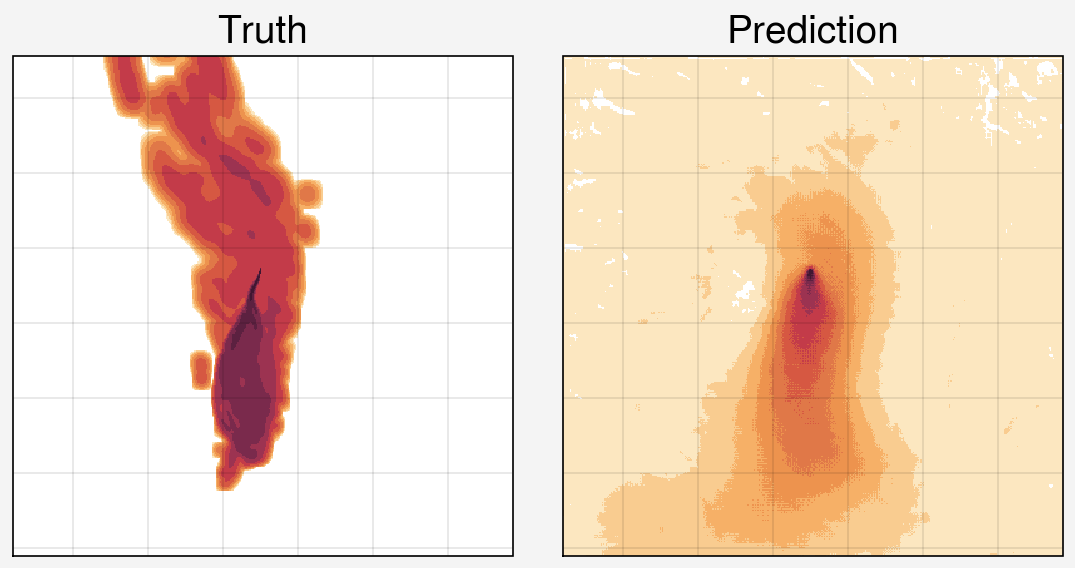

In [7]:
model.load_weights('exp1/Unet_checkpt_0.23.h5')

fnow = test_list[47]
_pred = np.load(fnow)['pred']
_pred6h = np.load(fnow)['_6hpred']
lons = np.load(fnow)['lons']
lats = np.load(fnow)['lats']
truth = np.load(fnow)['obs']
_xy = ftnet.transform_func_6h(_pred, _pred6h, truth)
_input, truth = _xy[:,:,:-1], _xy[:, :, -1]
pred = model.predict(_input[np.newaxis, :, :, :])
pred = np.squeeze(pred)
pred[pred <= 0] = np.nan

fig = pplt.figure(refwidth=2.5, share=False)
gs = pplt.GridSpec(ncols=2, nrows=1, wspace=2, hspace=2)
markercolor='green'

ax = fig.subplot(gs[0, 0], proj='cyl', number=1)
ax.pcolormesh(lons, lats, truth, extend='both', vmin=0, vmax=15) # 
ax.coastlines(lw=1.5)
ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)], crs=ccrs.PlateCarree())
ax.set_title('Truth', fontsize=14)

ax = fig.subplot(gs[0, 1], proj='cyl', number=2)
ax.pcolormesh(lons, lats, pred, extend='both', vmin=0, vmax=15) # 
ax.coastlines(lw=1.5)
ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)], crs=ccrs.PlateCarree())
ax.set_title('Prediction', fontsize=14)


In [11]:
def IoU(truth, pred):
    intersec = np.logical_and(~np.isnan(truth), ~np.isnan(pred))
    union = np.logical_or(~np.isnan(truth), ~np.isnan(pred))
    return np.sum(intersec)/np.sum(union)

In [12]:
import proplot as pplt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

import cartopy.io.shapereader as shpreader
from mpl_toolkits.axes_grid1 import make_axes_locatable 

reader = shpreader.Reader('../../footnet_emulator_paper/countyl010g.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

1/1 [==============================] - 0s 23ms/step
0.26498407662305135 0.5047955774544773
0.5751268549545236 0.6079906620474995
0.7591883035039072 0.7533071677378105


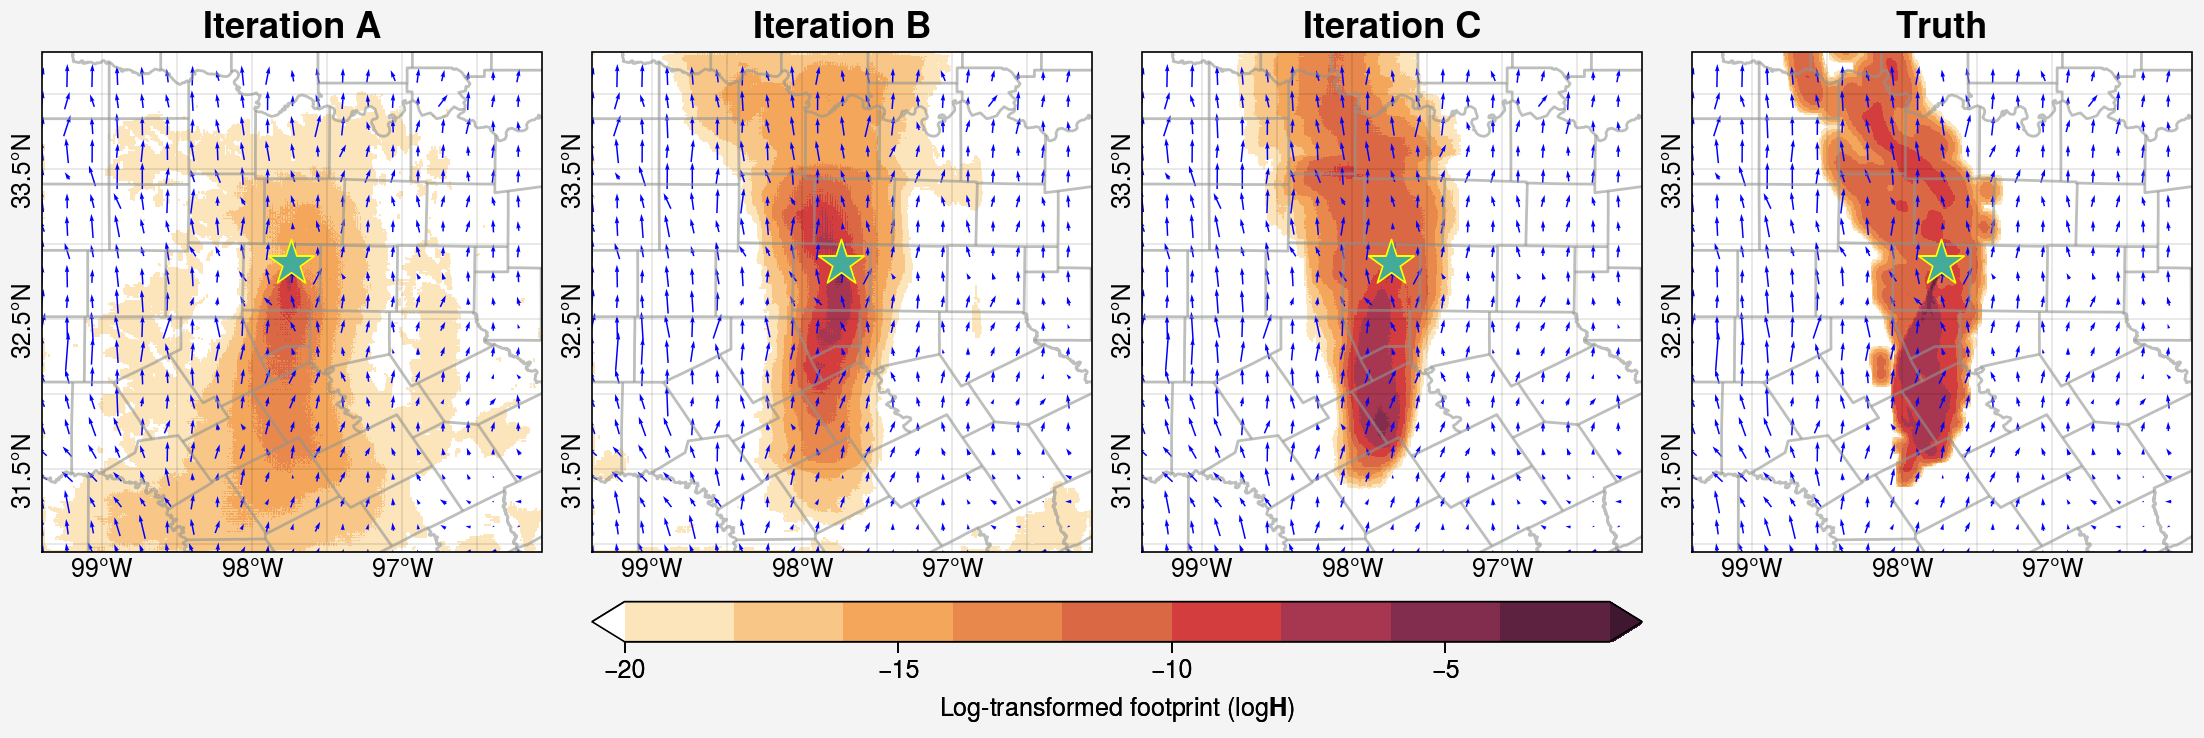

In [58]:
figmax = 0.9*-2.11583259529705

fig = pplt.figure(refwidth=2.5, share=False)
gs = pplt.GridSpec(ncols=4, nrows=1, wspace=2, hspace=2)
markercolor='#44AA99'


fnow = test_list[47]
_pred = np.load(fnow)['pred']
_pred6h = np.load(fnow)['_6hpred']
lons = np.load(fnow)['lons']
lats = np.load(fnow)['lats']
truth = np.load(fnow)['obs']
sitelon = np.load(fnow)['sitelon']
sitelat = np.load(fnow)['sitelat']
u = np.load(fnow)['pred'][:, :, 1]
v = np.load(fnow)['pred'][:, :, 2]

_xy = ftnet.transform_func_6h(_pred, _pred6h, truth)
_input, truth = _xy[:,:,:-1], _xy[:, :, -1]

model.load_weights('exp1/Unet_checkpt_0.23.h5')
iter1pred = model.predict(_input[np.newaxis])
iter1pred = np.squeeze(iter1pred)
model.load_weights('exp1/Unet_checkpt_0.41.h5')
iter3pred = model.predict(_input[np.newaxis])
iter3pred = np.squeeze(iter3pred)
model.load_weights('exp1/Unet_checkpt_0.59.h5')
iter4pred = model.predict(_input[np.newaxis])
iter4pred = np.squeeze(iter4pred)

truth[truth <= 0] = np.nan
iter1pred[iter1pred <= 1] = np.nan
iter3pred[iter3pred <= 1] = np.nan
iter4pred[iter4pred <= 1] = np.nan

truth = truth - 20
iter1pred = iter1pred - 20
iter3pred = iter3pred - 20
iter4pred = iter4pred - 20


ax = fig.subplot(gs[0, 0], proj='cyl', number=1)
m = ax.pcolormesh(lons, lats, iter1pred, vmax=figmax, vmin=-20, extend='both')
ax.quiver(lons[::20], lats[::20], u[::20, ::20], v[::20, ::20], pivot='mid', color='blue')
ax.scatter(sitelon, sitelat, marker='*', color=markercolor, edgecolor='yellow', s=300, zorder=3)
ax.add_feature(COUNTIES, facecolor='none', edgecolor='grey', lw=1, alpha=0.6)
ax.coastlines(lw=1.5)
ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)], crs=ccrs.PlateCarree())
ax.set_yticks([31.5, 32.5, 33.5])
ax.set_yticklabels(['31.5°N', '32.5°N', '33.5°N'], rotation=90, va='center')
ax.set_xticks([-99, -98, -97])
ax.set_xticklabels(['99°W', '98°W', '97°W'])
pred_nonnan = iter1pred[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter1pred)))]
truth_nonnan = truth[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter1pred)))]
rr = np.corrcoef(truth_nonnan, pred_nonnan)[0, 1]
print(IoU(truth, iter1pred), rr)
ax.set_title('Iteration A', fontsize=13,weight="bold")


ax = fig.subplot(gs[0, 1], proj='cyl', number=1)
m = ax.pcolormesh(lons, lats, iter3pred, vmax=figmax, vmin=-20, extend='both')
ax.quiver(lons[::20], lats[::20], u[::20, ::20], v[::20, ::20], pivot='mid', color='blue')
ax.scatter(sitelon, sitelat, marker='*', color=markercolor, edgecolor='yellow', s=300, zorder=3)
ax.add_feature(COUNTIES, facecolor='none', edgecolor='grey', lw=1, alpha=0.6)
ax.coastlines(lw=1.5)
ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)], crs=ccrs.PlateCarree())
ax.set_yticks([31.5, 32.5, 33.5])
ax.set_yticklabels(['31.5°N', '32.5°N', '33.5°N'], rotation=90, va='center')
ax.set_xticks([-99, -98, -97])
ax.set_xticklabels(['99°W', '98°W', '97°W'])
pred_nonnan = iter3pred[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter3pred)))]
truth_nonnan = truth[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter3pred)))]
rr = np.corrcoef(truth_nonnan, pred_nonnan)[0, 1]
print(IoU(truth, iter3pred), rr)
ax.set_title('Iteration B', fontsize=13,weight="bold")


ax = fig.subplot(gs[0, 2], proj='cyl', number=1)
m = ax.pcolormesh(lons, lats, iter4pred, vmax=figmax, vmin=-20, extend='both')
ax.quiver(lons[::20], lats[::20], u[::20, ::20], v[::20, ::20], pivot='mid', color='blue')
ax.scatter(sitelon, sitelat, marker='*', color=markercolor, edgecolor='yellow', s=300, zorder=3)
ax.add_feature(COUNTIES, facecolor='none', edgecolor='grey', lw=1, alpha=0.6)
ax.coastlines(lw=1.5)
ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)], crs=ccrs.PlateCarree())
ax.set_yticks([31.5, 32.5, 33.5])
ax.set_yticklabels(['31.5°N', '32.5°N', '33.5°N'], rotation=90, va='center')
ax.set_xticks([-99, -98, -97])
ax.set_xticklabels(['99°W', '98°W', '97°W'])
pred_nonnan = iter4pred[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter4pred)))]
truth_nonnan = truth[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter4pred)))]
rr = np.corrcoef(truth_nonnan, pred_nonnan)[0, 1]
print(IoU(truth, iter4pred), rr)
ax.set_title('Iteration C', fontsize=13,weight="bold")


ax = fig.subplot(gs[0, 3], proj='cyl', number=1)
m = ax.pcolormesh(lons, lats, truth, vmax=figmax, vmin=-20, extend='both')
ax.quiver(lons[::20], lats[::20], u[::20, ::20], v[::20, ::20], pivot='mid', color='blue')
ax.scatter(sitelon, sitelat, marker='*', color=markercolor, edgecolor='yellow', s=300, zorder=3)
ax.add_feature(COUNTIES, facecolor='none', edgecolor='grey', lw=1, alpha=0.6)
ax.coastlines(lw=1.5)
ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)], crs=ccrs.PlateCarree())
ax.set_yticks([31.5, 32.5, 33.5])
ax.set_yticklabels(['31.5°N', '32.5°N', '33.5°N'], rotation=90, va='center')
ax.set_xticks([-99, -98, -97])
ax.set_xticklabels(['99°W', '98°W', '97°W'])
ax.set_title('Truth', fontsize=13,weight="bold")

fig.colorbar(m, label='Log-transformed footprint (log$\mathbf{H}$)', ticks=[-20, -15, -10, -5, 0], loc='b', cols=(2,3), space=2)

plt.savefig('fig4top.png', dpi=400)

In [9]:
import glob

pred_list = glob.glob('exp1/predictions/*npz')

all_truth = []
all_pred = []

for i in range(len(pred_list)):
    truthnow = np.load(pred_list[i])['truth_log']
    prednow = np.load(pred_list[i])['pred_log']
    truthnow[truthnow <= 0] = np.nan
    prednow[prednow <= 1] = np.nan
    truthnow = truthnow - 20
    prednow = prednow - 20
    pred_nonnan = prednow[np.where(np.logical_and(~np.isnan(truthnow), ~np.isnan(prednow)))]
    truth_nonnan = truthnow[np.where(np.logical_and(~np.isnan(truthnow), ~np.isnan(prednow)))]
    
    all_truth += list(truth_nonnan)
    all_pred += list(pred_nonnan)

1/1 [==============================] - 0s 23ms/step


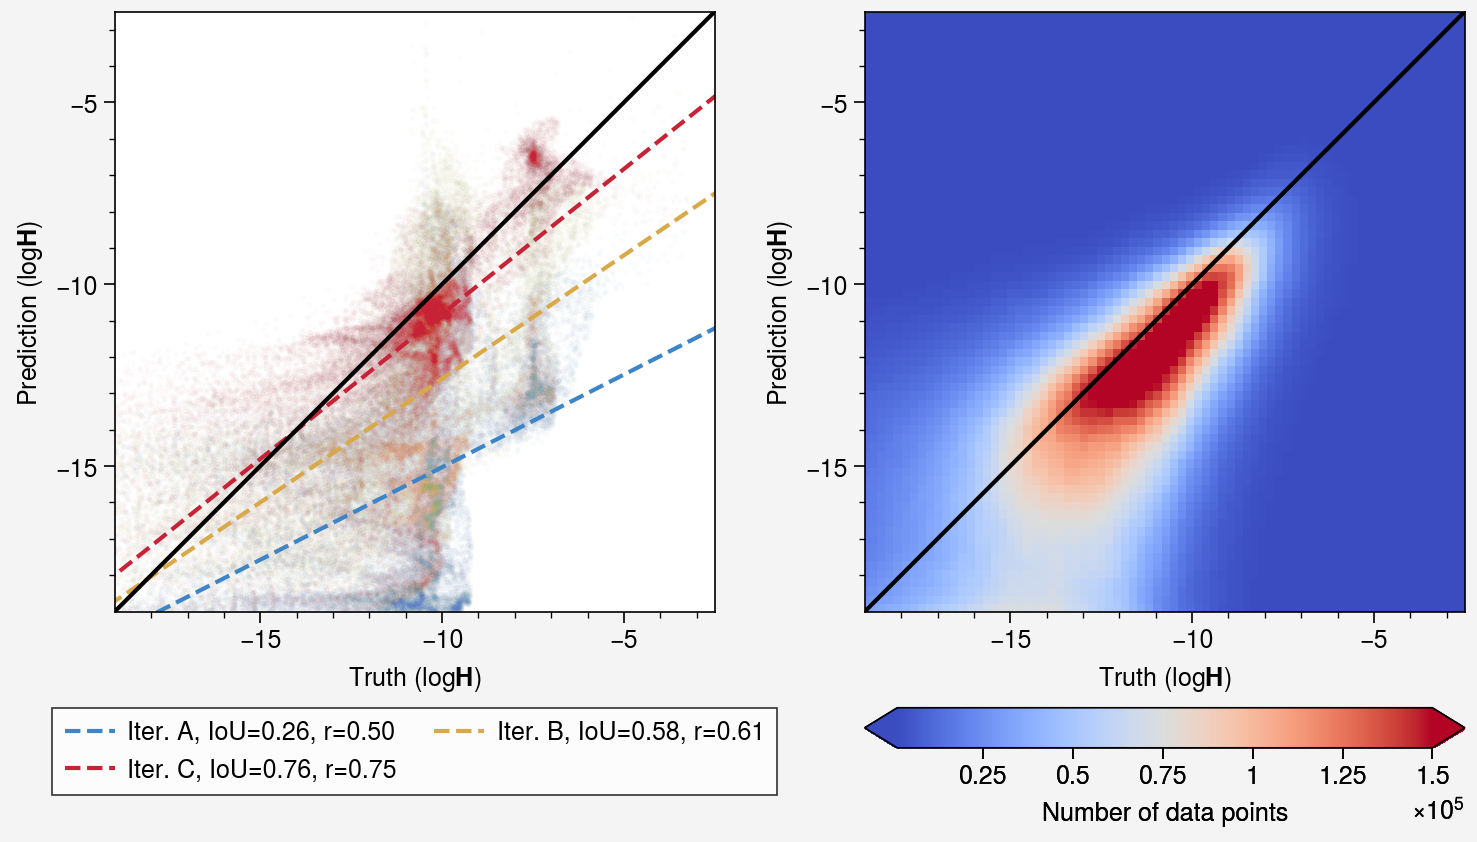

In [13]:
fig = pplt.figure(refwidth=3, share=False)
gs = pplt.GridSpec(ncols=2, nrows=1, wspace=6, hspace=2)

fnow = test_list[47]
_pred = np.load(fnow)['pred']
_pred6h = np.load(fnow)['_6hpred']
lons = np.load(fnow)['lons']
lats = np.load(fnow)['lats']
truth = np.load(fnow)['obs']
sitelon = np.load(fnow)['sitelon']
sitelat = np.load(fnow)['sitelat']
u = np.load(fnow)['pred'][:, :, 1]
v = np.load(fnow)['pred'][:, :, 2]

_xy = ftnet.transform_func_6h(_pred, _pred6h, truth)
input_vector, truth = _xy[:,:,:-1], _xy[:, :, -1]

model.load_weights('exp1/Unet_checkpt_0.23.h5')
iter1pred = model.predict(input_vector[np.newaxis])
iter1pred = np.squeeze(iter1pred)
model.load_weights('exp1/Unet_checkpt_0.41.h5')
iter2pred = model.predict(input_vector[np.newaxis])
iter2pred = np.squeeze(iter2pred)
model.load_weights('exp1/Unet_checkpt_0.59.h5')
iter3pred = model.predict(input_vector[np.newaxis])
iter3pred = np.squeeze(iter3pred)

truth[truth <= 0] = np.nan
iter1pred[iter1pred <= 1] = np.nan
iter2pred[iter2pred <= 1] = np.nan
iter3pred[iter3pred <= 1] = np.nan
truth -= 20
iter1pred -= 20
iter2pred -= 20
iter3pred -= 20

pred_nonnan1 = iter1pred[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter1pred)))]
truth_nonnan1 = truth[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter1pred)))]
rr1 = np.corrcoef(truth_nonnan1, pred_nonnan1)[0, 1]

pred_nonnan2 = iter2pred[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter2pred)))]
truth_nonnan2 = truth[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter2pred)))]
rr2 = np.corrcoef(truth_nonnan2, pred_nonnan2)[0, 1]

pred_nonnan3 = iter3pred[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter3pred)))]
truth_nonnan3 = truth[np.where(np.logical_and(~np.isnan(truth), ~np.isnan(iter3pred)))]
rr3 = np.corrcoef(truth_nonnan3, pred_nonnan3)[0, 1]

ax = fig.subplot(gs[0, 0])
ax.scatter(truth_nonnan1, pred_nonnan1, marker='.', color='#3d85c6', alpha=0.01, markersize=8)
ax.scatter(truth_nonnan2, pred_nonnan2, marker='.', color='#D9A949', alpha=0.01, markersize=8)
ax.scatter(truth_nonnan3, pred_nonnan3, marker='.', color='#C72336', alpha=0.01, markersize=8)

z1 = np.polyfit(truth_nonnan1, pred_nonnan1, 1)
z2 = np.polyfit(truth_nonnan2, pred_nonnan2, 1)
z3 = np.polyfit(truth_nonnan3, pred_nonnan3, 1)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
p3 = np.poly1d(z3)

#0.26498407662305135 0.5047955774544773
#0.5751268549545236 0.6079906620474995
#0.7591883035039072 0.7533071677378105

_xx = np.arange(-40, 1, 0.5)
ax.plot(_xx, p1(_xx), color='#3d85c6', ls='--', label='Iter. A, IoU=0.26, r=0.50')
ax.plot(_xx, p2(_xx), color='#D9A949', ls='--', label='Iter. B, IoU=0.58, r=0.61')
ax.plot(_xx, p3(_xx), color='#C72336', ls='--', label='Iter. C, IoU=0.76, r=0.75')
ax.plot(_xx, _xx, color='k', ls='-')
ax.legend(loc='b', ncols=2)
ax.format(xlim=(-19, -2.5), ylim=(-19,-2.5), xlabel='Truth (log$\mathbf{H}$)', ylabel='Prediction (log$\mathbf{H}$)', grid=False, xticks=[-20, -15, -10, -5, 0], yticks=[-20, -15, -10, -5, 0])


ax = fig.subplot(gs[0, 1])
_ = ax.hist2d(all_truth, all_pred, bins=(100, 100), extend='both', cmap='coolwarm', vmin=1e3, vmax=1.5e5)
# rr_all = np.corrcoef(all_truth, all_pred)[0, 1]
ax.plot(_xx, _xx, color='k', ls='-')
# z = np.polyfit(all_truth, all_pred, 1)
# p = np.poly1d(z)
# ax.plot(_xx, p(_xx), color='green', ls='--')
# ax.text(-18, -6, 'r=%.2f'%(rr_all), fontsize=12, color='k')

ax.format(xlim=(-19, -2.5), ylim=(-19,-2.5), xlabel='Truth (log$\mathbf{H}$)', ylabel='Prediction (log$\mathbf{H}$)', grid=False, xticks=[-20, -15, -10, -5, 0], yticks=[-20, -15, -10, -5, 0])
cbar = ax.colorbar(_[3], loc='b', label='Number of data points')
cbar.formatter.set_powerlimits((0, 0))

plt.savefig('fig4bot.png', dpi=400)

In [14]:
rr_all = np.corrcoef(all_truth, all_pred)[0, 1]
rr_all

0.5752334338963202